# Exercício James capítulo 2 página 67¶

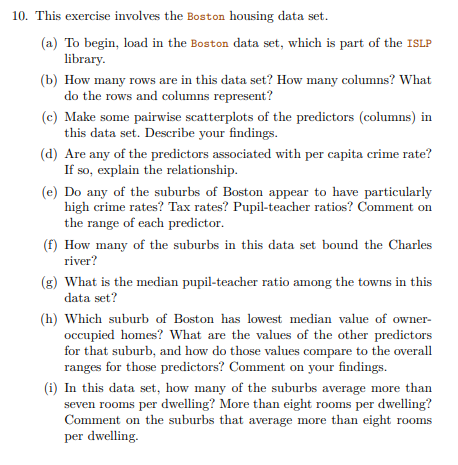

### (a) Carregue o conjunto de dados de Boston.

In [1]:
import pandas as pd
Boston = pd.read_csv('Boston.csv')

In [2]:
Boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


## (b) Quantas linhas existem neste conjunto de dados? Quantas colunas? O que as linhas e colunas representam?

506 linha e 14 colunas<br><br>
Cada linha representa um conjunto de observações de variáveis preditoras para um determinado bairro em Boston.<br><br>
Cada coluna representa uma das variáveis preditoras para a qual foi feita uma observação em 506 bairros de Boston.<br><br>

|n|X|Significado|
|------|------|------|
|1|CRIM|taxa de criminalidade per capita por bairro|
|2|ZN|proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados (mais de 40x50m-grande)|
|3|INDUS|proporção de hectares comerciais não varejistas (não vende direto para o consumidor) por bairro|
|4|CHAS|Variável dummy Charles River (1 se o rio passa no bairro; 0 caso contrário)|
|5|NOX|concentração de óxidos nítricos (partes por 10 milhões)|
|6|RM|número médio de quartos por casa|
|7|IDADE|proporção de unidades ocupadas pelos proprietários construídas antes de 1940|
|8|DIS|distâncias ponderadas para cinco centros de emprego de Boston|
|9|RAD|índice de acessibilidade às rodovias radiais|
|10|TAX|taxa de imposto sobre a propriedade de valor total por US 10.000|
|11|PTRATIO|proporção aluno-professor por cidade|
|12|B|1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade|
|13|LSTAT|status mais baixo da população|
|14|MEDV|Valor médio das casas ocupadas pelos proprietários em US 1.000|

O conjunto de dados habitacionais de Boston é um conjunto de dados de referência clássico na área de mineração de dados. Foi originalmente
usado por Harrison e Rubinfeld em 1978. O conjunto de dados trata dos valores habitacionais nos subúrbios de Boston.
Existem 506 observações com 13 atributos contínuos e 1 binário

Este conjunto de dados contém informações coletadas pelo Serviço de Censo dos EUA sobre moradias na área de Boston Massachusetts

## (c) Faça alguns gráficos de dispersão aos pares dos preditores (colunas) neste conjunto de dados. Descreva suas descobertas.

In [3]:
import seaborn as sns
import time

tempo  17.61005210876465


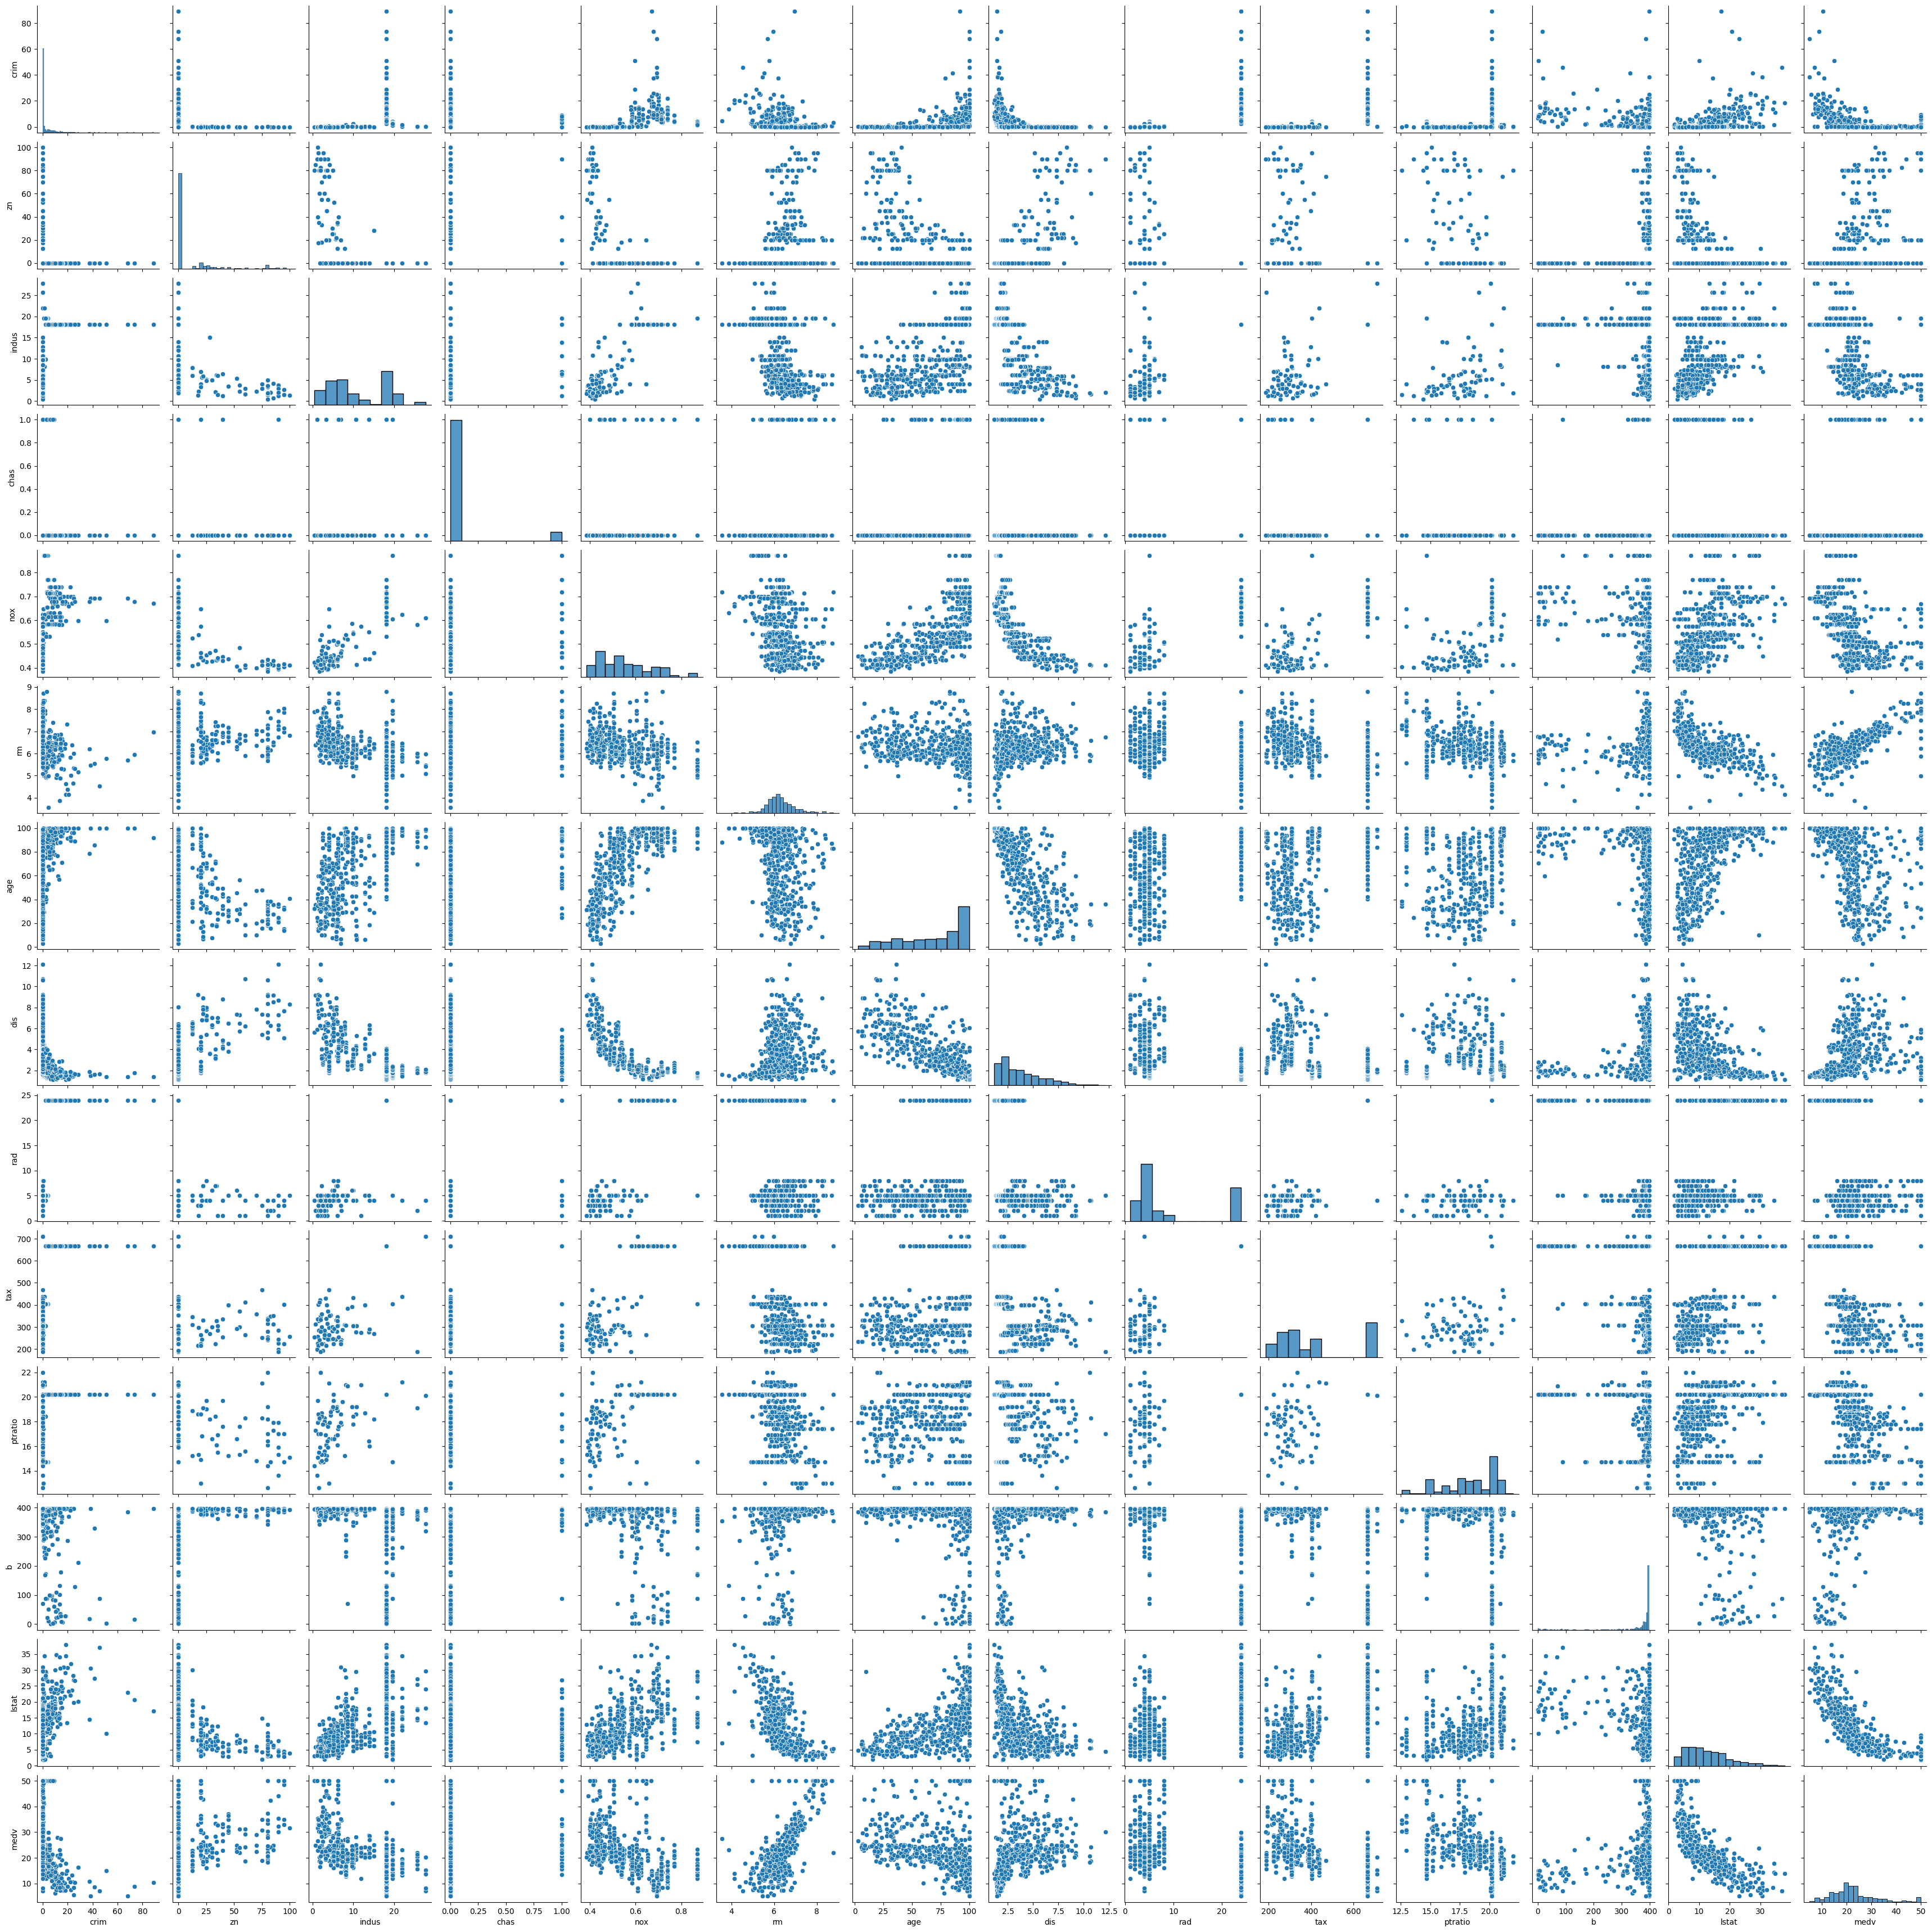

In [4]:
ti = time.time()
sns.pairplot(Boston);
tf = time.time()
print('tempo ',tf-ti)

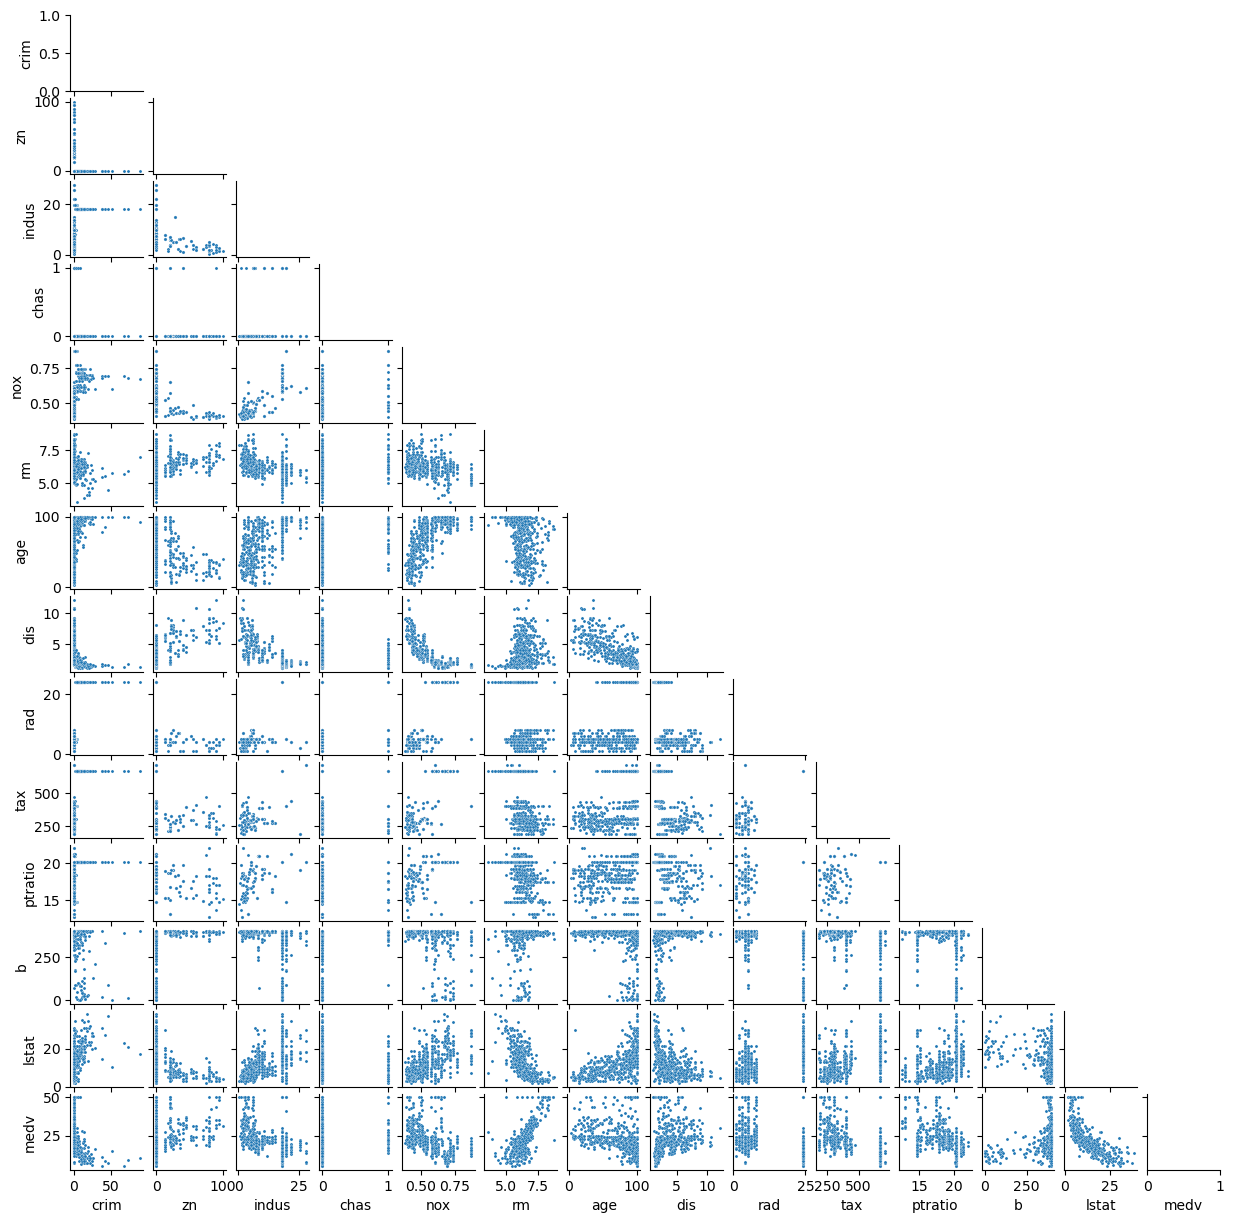

In [7]:
g = sns.PairGrid(Boston, corner=True)

#g.map_lower(plt.scatter, s=3)
g.map_lower(sns.scatterplot, s=5);

g.fig.set_size_inches(12, 12)

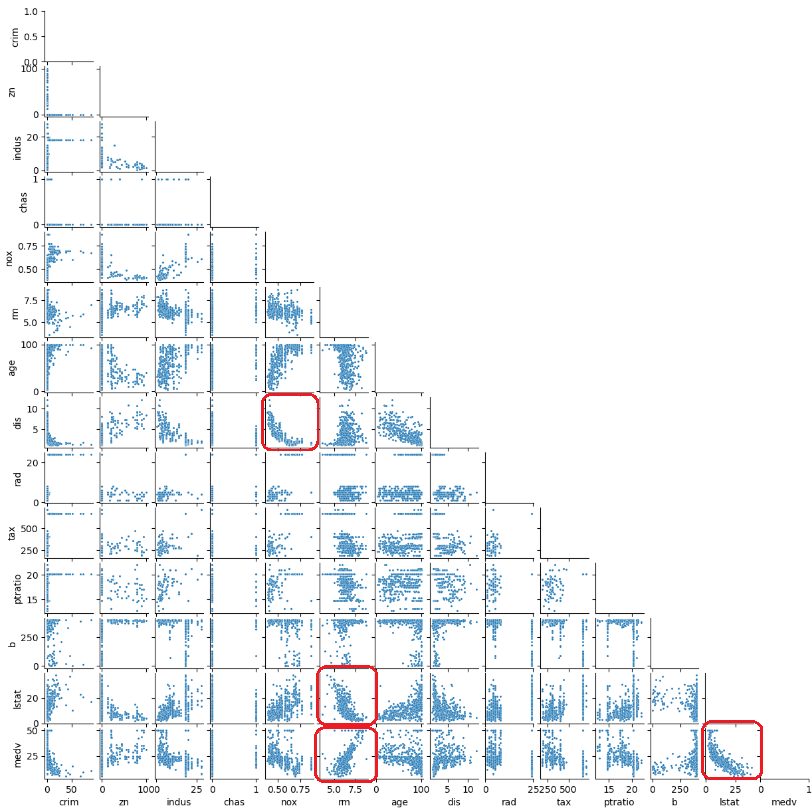

### Descobertas: 
* Parece que há uma **relação negativa não linear** entre **dis** (distância do trabalho) e **nox** (poluição).<br>Esperado, pois os empregos estão onde têm mais comércio, indústrias, máquinas, veículos, etc. Quanto menor a distância, maior a poluição.

* Parece que há uma **relação negativa não linear** entre **lstat** (porcentagem de pessoas mais pobres) e **rm**.<br>Esperado, pois menor mais baixo, salário menor, casa menor.

* Parece que há uma **relação positiva linear** entre **medv** (valor médio da casa) e **rm** (número de cômodos).<br>Esperado, pois casa maior tem preço maior.

* Parece que há uma **relação negativa não linear** entre **lstat** (valor médio da casa) e **medv** (porcentagem de pessoas mais pobres).<br>Esperado, pois status mais baixo, salário menor, casa mais barata.

## (d) Algum dos preditores está associado à taxa de criminalidade per capita? Se sim, explique a relação.

In [5]:
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'medv'],
      dtype='object')

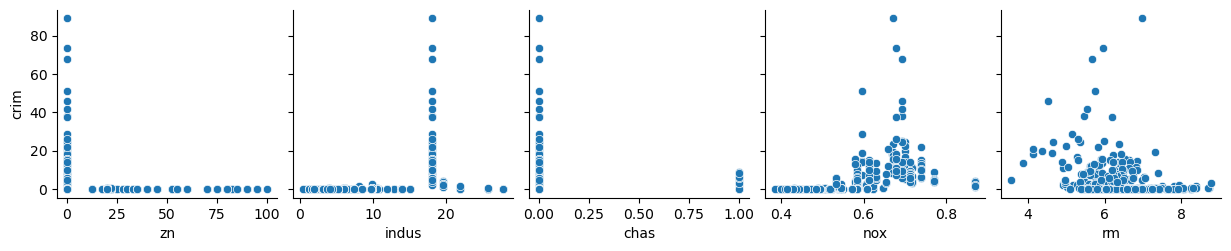

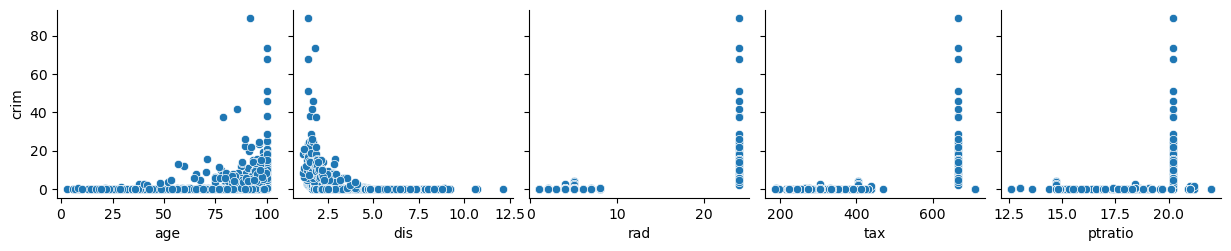

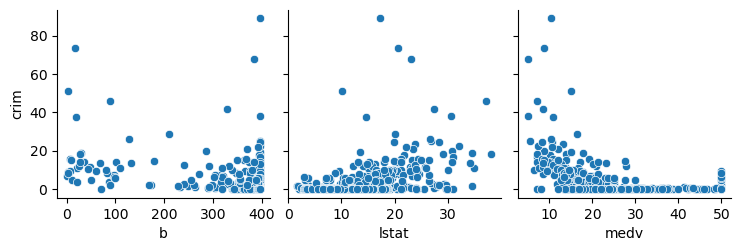

In [10]:
sns.pairplot(Boston, y_vars=['crim'], x_vars=['zn', 'indus', 'chas', 'nox', 'rm'])
sns.pairplot(Boston, y_vars=['crim'], x_vars=['age', 'dis', 'rad', 'tax', 'ptratio'])
sns.pairplot(Boston, y_vars=['crim'], x_vars=['b', 'lstat', 'medv']);

### Descobertas
* À medida que **age** aumenta, **crim** aumenta.

* À medida que **dis** aumenta, **crim** diminui.

* Quando **rad** é 24 (seu valor máximo), **crim** é muito maior e mais variado (de pequenas a altas taxas de criminilaidade).

* Quando **tax** está entre 650 e 700, **crim** é muito maior e mais variado.

* Para **lstat** < 10, **crim** < 10. Para **lstat** > 10, **crim** é mais distribuído. Para **lstat** < 20, boa parte dos valores de **crim** estão próximos de 0.

* Quando **medv** aumenta, **crim** diminui.

* Não há uma associação clara entre **b** e **crim**.

## (e) Algum dos subúrbios de Boston parece ter particularmente altas taxas de criminalidade? Taxas de imposto? Proporção aluno-professor? Comente observando o intervalo de cada preditor.

### Análise usando histogramas
Um histograma é uma espécie de gráfico de barras que demonstra uma distribuição de frequências. No histograma, a base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência absoluta com que o valor de cada classe ocorre

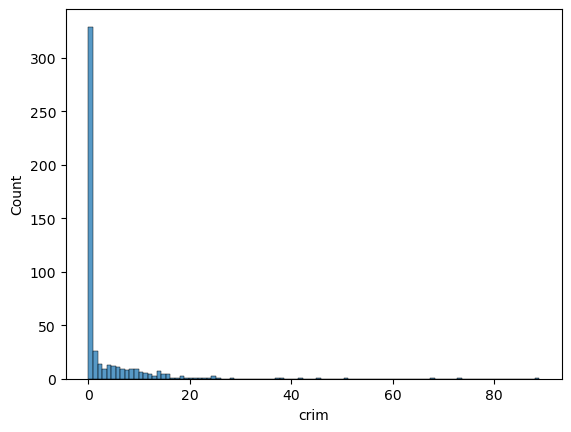

In [11]:
sns.histplot(Boston['crim']);

In [14]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

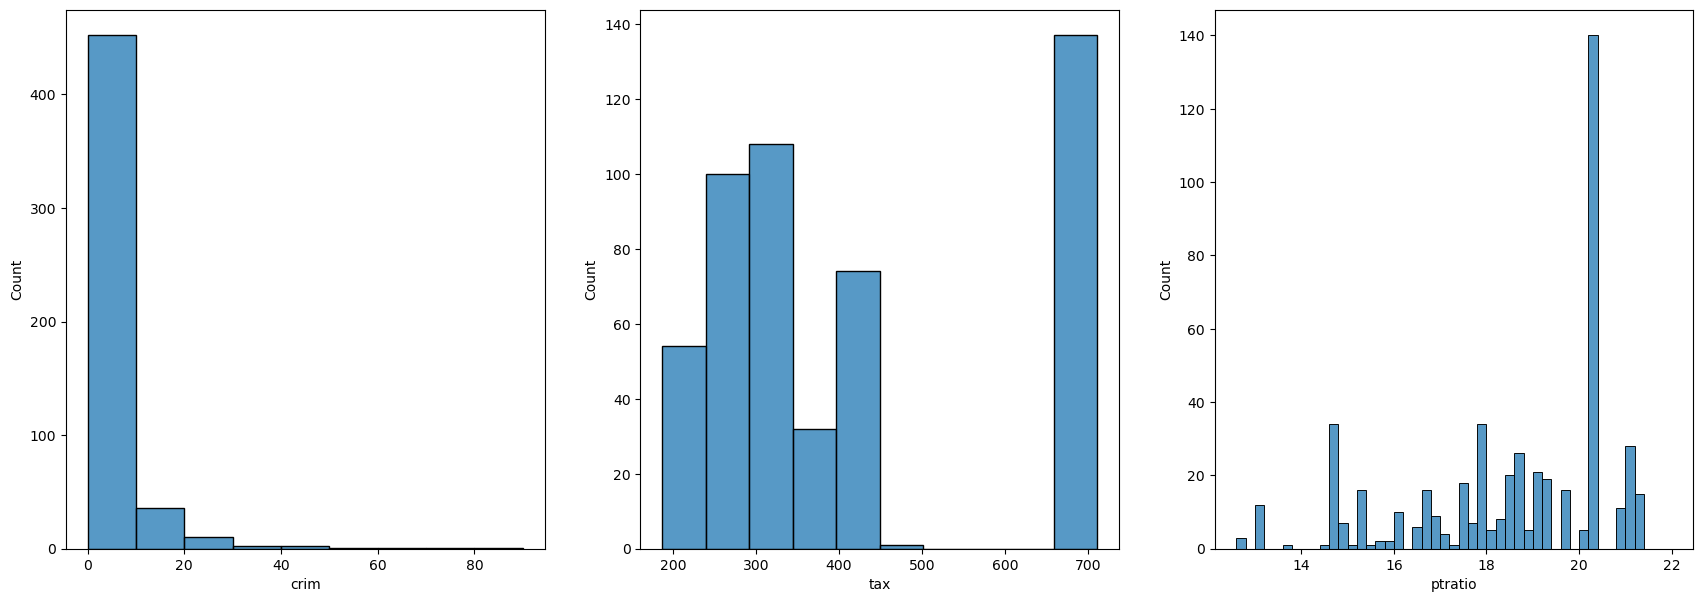

In [22]:
figura, eixo = subplots(ncols=3, figsize=(21,7))

sns.histplot(Boston['crim'], binwidth=10, ax=eixo[0])
sns.histplot(Boston['tax'], ax=eixo[1])
sns.histplot(Boston['ptratio'], binwidth=0.2, ax=eixo[2]);

In [39]:
(Boston['crim'] < 10).sum()

452

In [81]:
(Boston['crim'] > 10).sum(),(Boston['crim'] > 20).sum(),(Boston['crim'] > 30).sum(), \
(Boston['crim'] > 40).sum(), (Boston['crim'] > 50).sum(),(Boston['crim'] > 60).sum(), \
(Boston['crim'] > 70).sum(),(Boston['crim'] > 80).sum()
#  \  barra invertida para continuar o comando na linha de baixo

(54, 18, 8, 6, 4, 3, 2, 1)

In [33]:
((Boston['ptratio'] > 20.1) & (Boston['ptratio'] < 20.3)).sum()

140

### Descobertas
* Existem muito poucos subúrbios de Boston com alto **crim**.
* Há muitas casas com **tax** até 450, e também, muitos subúrbios com **tax** em torno de 680.
* **ptratio** relativamente uniforme, no entanto, há um pico entre 20 e 21 com maior frequência de observações.

## (f) Em quantos bairros o rio Charles passa?

In [48]:
(Boston['chas'] == 1).sum()

35

## (g) Qual é a mediana da razão aluno-professor entre as cidades neste dataset?

* Média: uma média que é encontrada somando todos os valores em um conjunto de dados e dividindo-a pelo número total de valores somados.<br>
* Mediana: o número do meio no conjunto de valores. Você o encontra colocando os números em ordem, do menor para o maior, e cobrindo um número em cada extremidade até chegar ao meio.<br><br>
A mediana fornece uma medida útil do centro de um conjunto de dados. Ao comparar a mediana com a média, podemos ter uma ideia da distribuição do conjunto de dados.<br><br>
* Quando a média e a mediana são iguais, o conjunto de dados é distribuído, mais ou menos, uniformemente, dos valores mais baixos para os mais altos.
* Quando a média e a mediana são diferentes, é provável que os dados não sejam simétricos
  - Assimetria à direita (positiva): a cauda direita da distribuição é mais longa do que a cauda esquerda. Isso significa que há valores extremos maiores do que o esperado pela média na distribuição.
  - Assimetria à esquerda (negativa): a cauda esquerda da distribuição é mais longa do que a cauda direita. Isso indica a presença de valores extremos menores do que o esperado pela média na distribuição.
  

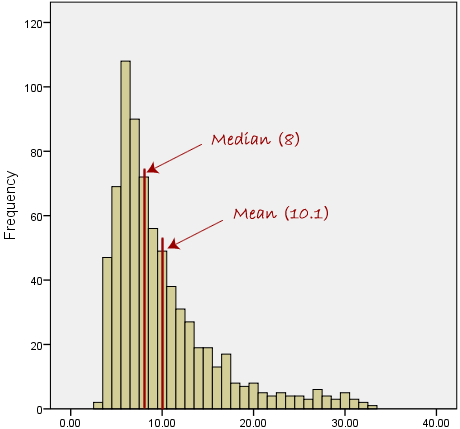
https://statistics.laerd.com/statistical-guides/measures-central-tendency-mean-mode-median.php

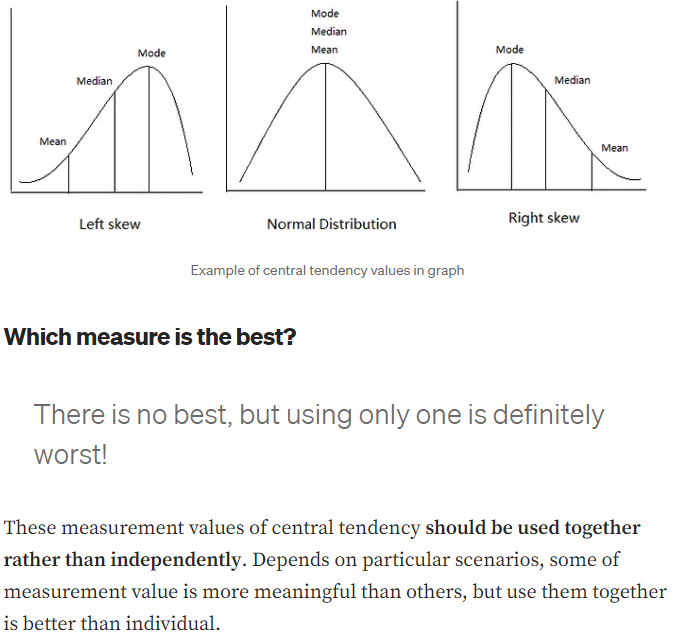
 

In [50]:
Boston['ptratio'].mean(),Boston['ptratio'].median()

(18.455533596837945, 19.05)

## (h) Qual subúrbio de Boston tem o valor médio mais baixo de casas ocupadas pelos proprietários? Quais são os valores dos outros preditores para este subúrbio e como esses valores se comparam ao total de intervalos para esses preditores? Comente suas descobertas.

Series.idxmin()
Retorna o índice da linha do valor mínimo. Se vários valores forem iguais ao mínimo, o índice da primeira linha com esse valor será retornado.

In [52]:
Boston['medv'].idxmin()

398

In [53]:
Boston.iloc[398]

crim        38.3518
zn           0.0000
indus       18.1000
chas         0.0000
nox          0.6930
rm           5.4530
age        100.0000
dis          1.4896
rad         24.0000
tax        666.0000
ptratio     20.2000
b          396.9000
lstat       30.5900
medv         5.0000
Name: 398, dtype: float64

In [58]:
Boston.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Descobertas

* **crim** maior que a média e maior que a mediana.
* Nenhum terreno **zn** (isto se aplica a mais da metade dos bairros de Boston).
* **indus** é muito alta em comparação com a maioria dos outros bairros.
* Não margeia o rio Charles, **chas** é 0.
* **nox** é uma das mais altas.
* **rm** é um dos mais baixos.
* Tem a maoir **age**.
* Uma das maiores **dis**.
* Maior **rad**.
* Uma das maiores **tax**.
* Uma das maiores **ptratio**.
* Maior **b**.
* Um dos maoires lstat.
* Menor medv.

Com base na lista acima, o subúrbio 398 pode ser classificado como um dos lugares menos desejáveis para se viver em Boston.

## (i) Neste conjunto de dados, quantos subúrbios têm em média mais do que sete cômodos por habitação? Mais de oito cômodos por habitação? Comente sobre os subúrbios que têm em média mais de oito quartos por habitação.

In [60]:
(Boston['rm'] > 7).sum()

64

In [64]:
len(Boston[Boston['rm'] > 7])

64

In [65]:
(Boston['rm'] > 7).value_counts()

False    442
True      64
Name: rm, dtype: int64

In [66]:
(Boston['rm'] > 7).value_counts()[1]

64

In [70]:
print("Quantidade de subúrbios com casas com mais de 7 cômodos:",(Boston['rm'] > 7).sum())
print("Há", (Boston['rm'] > 7).sum(), "subúrbios com casas com mais de 7 cômodos")

Quantidade de subúrbios com casas com mais de 7 cômodos: 64
Há 64 subúrbios com casas com mais de 7 cômodos


In [71]:
print("Há", (Boston['rm'] > 8).sum(), "subúrbios com casas com mais de 7 cômodos")

Há 13 subúrbios com casas com mais de 7 cômodos


In [74]:
(Boston[       Boston['rm'] > 7           ])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0,0.7130,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8


In [76]:
(Boston[       Boston['rm'] > 8           ]).describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000,13.000000
mean,0.718795,13.615385,7.078462,0.153846,0.539238,8.348538,71.538462,3.430192,7.461538,325.076923,16.361538,385.210769,4.310000,44.200000
std,0.901640,26.298094,5.392767,0.375534,0.092352,0.251261,24.608723,1.883955,5.332532,110.971063,2.410580,10.529359,1.373566,8.092383
min,0.020090,0.000000,2.680000,0.000000,0.416100,8.034000,8.400000,1.801000,2.000000,224.000000,13.000000,354.550000,2.470000,21.900000
25%,0.331470,0.000000,3.970000,0.000000,0.504000,8.247000,70.400000,2.288500,5.000000,264.000000,14.700000,384.540000,3.320000,41.700000
50%,0.520140,0.000000,6.200000,0.000000,0.507000,8.297000,78.300000,2.894400,7.000000,307.000000,17.400000,386.860000,4.140000,48.300000
75%,0.578340,20.000000,6.200000,0.000000,0.605000,8.398000,86.500000,3.651900,8.000000,307.000000,17.400000,389.700000,5.120000,50.000000
max,3.474280,95.000000,19.580000,1.000000,0.718000,8.780000,93.900000,8.906700,24.000000,666.000000,20.200000,396.900000,7.440000,50.000000


### Descobertas

* **crim** baixo
* **zn** alto (bastante casas grandes)
* **indus** abaixo da média
* Em alguns dos subúrbios o rio Charles passa
* **lstat** menor que a média